In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [13]:
rmse = lambda y, yh: mean_squared_error(y, yh) ** 0.5

In [14]:
train = pd.read_csv('train.csv')

In [14]:
x, y = train.drop(['Pawpularity', 'Id'], axis=1), train['Pawpularity']

In [55]:
searcher = RandomizedSearchCV(
    Ridge(),
    param_distributions={
        'alpha' : np.logspace(-3, 2, 5),
    },
    scoring=make_scorer(rmse, greater_is_better=False),
)
searcher.fit(x, y)
pd.DataFrame(searcher.cv_results_).sort_values('mean_test_score', ascending=False).head(3)

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.055376,0.040969,0.002275,0.000084,100.0,{'alpha': 100.0},-20.706991,-20.832444,-20.892585,-20.116125,-20.410057,-20.591640,0.290154,1
3,0.036969,0.038921,0.002110,0.000270,5.623413,{'alpha': 5.623413251903491},-20.711873,-20.841458,-20.882045,-20.124791,-20.424493,-20.596932,0.285288,2
2,0.037637,0.040377,0.004185,0.004209,0.316228,{'alpha': 0.31622776601683794},-20.712395,-20.842336,-20.881217,-20.125766,-20.425929,-20.597529,0.284819,3


<BarContainer object of 12 artists>

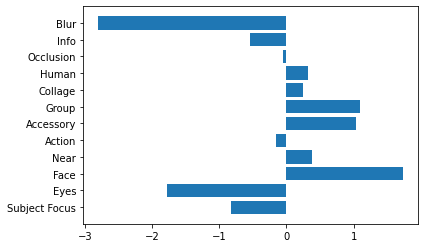

In [56]:
plt.barh(x.columns, searcher.best_estimator_.coef_)

In [58]:
searcher = RandomizedSearchCV(
    DecisionTreeRegressor(),
    param_distributions={
        'max_depth' : [2, 3, 4, 5, 7],
        'min_samples_leaf' : [1, 5, 10, 20],
    },
    scoring=make_scorer(rmse, greater_is_better=False),
)
searcher.fit(x, y)
pd.DataFrame(searcher.cv_results_).sort_values('mean_test_score', ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.003039,0.000011,0.001082,0.000007,20,4,"{'min_samples_leaf': 20, 'max_depth': 4}",-20.724102,-20.845043,-20.881135,-20.116175,-20.385732,-20.590437,0.294627,1
9,0.002781,0.000020,0.001076,0.000007,20,3,"{'min_samples_leaf': 20, 'max_depth': 3}",-20.713134,-20.830522,-20.922633,-20.123433,-20.364528,-20.590850,0.300725,2
0,0.003312,0.000403,0.001392,0.000059,20,2,"{'min_samples_leaf': 20, 'max_depth': 2}",-20.719079,-20.820220,-20.904759,-20.122009,-20.396656,-20.592545,0.291582,3


<BarContainer object of 12 artists>

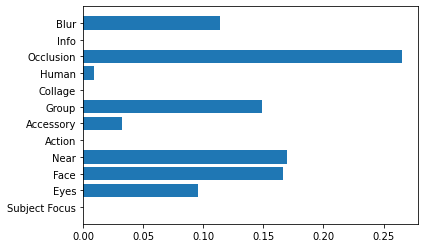

In [59]:
plt.barh(x.columns, searcher.best_estimator_.feature_importances_)

In [63]:
import shap

In [1]:
# explainer = shap.Explainer(model)

## Embedding model

In [7]:
from utils import load_pickle
import numpy as np

In [4]:
embs, ids = load_pickle('artifacts/embs/efficientnet_v2_m__embs.pkl')
ids = np.array(ids)

In [21]:
x = embs
y = train.set_index('Id').loc[ids]['Pawpularity'].to_numpy()

In [22]:
searcher = RandomizedSearchCV(
    Ridge(),
    param_distributions={
        'alpha' : np.logspace(-3, 2, 5),
    },
    scoring=make_scorer(rmse, greater_is_better=False),
)
searcher.fit(x, y)
pd.DataFrame(searcher.cv_results_).sort_values('mean_test_score', ascending=False).head(3)

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.498241,0.054546,0.020635,0.029615,100.0,{'alpha': 100.0},-19.565354,-19.212116,-19.381084,-19.634901,-19.192691,-19.397229,0.179509,1
3,0.483854,0.090662,0.072396,0.030676,5.623413,{'alpha': 5.623413251903491},-20.260892,-19.843242,-20.040607,-20.262112,-19.737864,-20.028943,0.213315,2
2,0.426377,0.065902,0.070769,0.030507,0.316228,{'alpha': 0.31622776601683794},-20.329747,-19.909536,-20.108016,-20.323408,-19.792759,-20.092693,0.215947,3


In [23]:
searcher = RandomizedSearchCV(
    DecisionTreeRegressor(),
    param_distributions={
        'max_depth' : [3, 5, 7, 9],
        'min_samples_leaf' : [5],
    },
    scoring=make_scorer(rmse, greater_is_better=False),
)
searcher.fit(x, y)
pd.DataFrame(searcher.cv_results_).sort_values('mean_test_score', ascending=False).head(3)

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.002368,0.010808,0.002658,0.000025,5,3,"{'min_samples_leaf': 5, 'max_depth': 3}",-19.742288,-20.263004,-19.985568,-20.196229,-20.015338,-20.040485,0.182395,1
1,3.083335,0.030108,0.002975,0.000399,5,5,"{'min_samples_leaf': 5, 'max_depth': 5}",-20.113000,-20.383295,-20.225062,-20.668222,-20.400390,-20.357994,0.187815,2
2,4.059315,0.022559,0.003517,0.001326,5,7,"{'min_samples_leaf': 5, 'max_depth': 7}",-20.536974,-20.751426,-20.843196,-21.122521,-21.136045,-20.878033,0.227995,3
